In [15]:
from looti import cosmo_emulator as cem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [20]:
data_path = '../training_data/'

### Pk

In [21]:
LootiEmu_pk = cem.CosmoEmulator()

In [22]:
LootiEmu_pk.read_data(cosmo_quantity='Plin', data_path=data_path, n_params=7, n_train=300, n_test=10)

In [23]:
LootiEmu_pk.create_intobj(cosmo_quantity='Plin', n_params=7, mult_gp=False)

In [34]:
input_dict_pk = {'w0_fld': -0.924765, 
                 'wa_fld': 0.108150, 
                 'Omega_m': 0.328527, 
                 'Omega_b': 0.056975, 
                 'h': 0.695204, 
                 'n_s': 1.089404, 
                 'A_s': 2.387406e-09}

In [35]:
k_grid, pk_pred = LootiEmu_pk.get_prediction(cosmo_quantity='Plin',input_dict=input_dict_pk)

In [36]:
df = pd.read_csv('../training_data/Plin.csv', index_col=list(range(16)))
pks = df.loc['Plin'].values[0].flatten()
ks = df.loc['grid'].values.flatten()

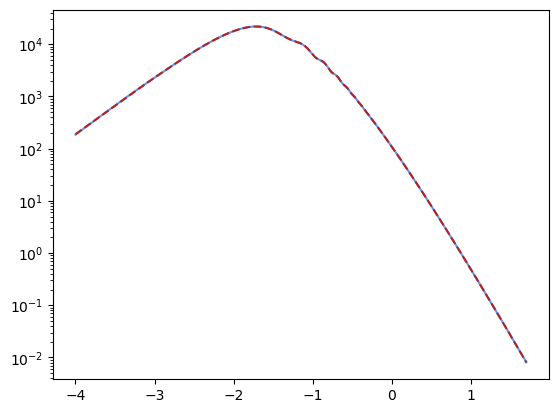

In [37]:
import matplotlib.pyplot as plt
plt.semilogy(k_grid, pk_pred, color='cornflowerblue')
plt.semilogy(np.log10(ks), pks, linestyle='--', color='firebrick')

In [ ]:
emulation_data_pk = LootiEmu_pk.data['Plin']
intobj_pk = LootiEmu_pk.intobjs['Plin']

In [ ]:
save_path = '.../interpolators/'
save_name = 'Plin'

In [ ]:
pickle.dump(emulation_data_pk, open(save_path+save_name+'_data.sav', 'wb'))
pickle.dump(intobj_pk, open(save_path+save_name+'.sav', 'wb'))

## Cls

In [1]:
from looti import cosmo_emulator as cem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
data_path = '../training_data/'

In [3]:
LootiEmu_cl = cem.CosmoEmulator()

In [4]:
LootiEmu_cl.read_data(cosmo_quantity='ttcl', data_path=data_path, n_params=6, n_train=300, n_test=10, features_to_Log=False)

In [6]:
LootiEmu_cl.create_intobj(cosmo_quantity='ttcl', n_params=6, mult_gp=False)

In [7]:
input_dict_cl = {'omega_b': 0.022834, 
                 'omega_cdm': 0.118206, 
                 'H0': 65.9587, 
                 'A_s': 2.119838e-09, 
                 'n_s': 0.96172, 
                 'tau_reio': 0.064729}

In [9]:
l_grid, cl_pred = LootiEmu_cl.get_prediction(cosmo_quantity='ttcl',input_dict=input_dict_cl)

In [10]:
df = pd.read_csv('../training_data/ttcl.csv', index_col=list(range(14)))
cls = df.loc['ttcl'].values[0].flatten()
ell = df.loc['grid'].values.flatten()

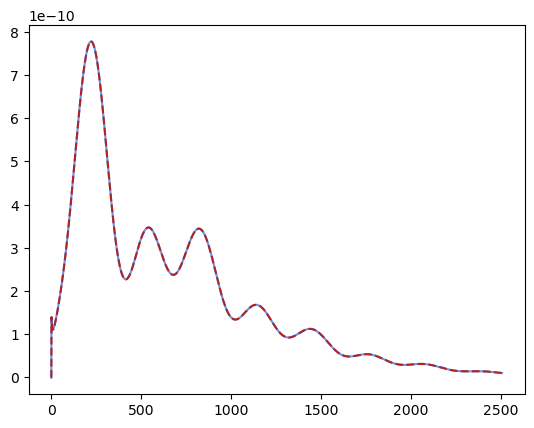

In [18]:
import matplotlib.pyplot as plt
plt.plot(ell, cls* ell * (ell + 1) / 2. /np.pi, color='cornflowerblue')
plt.plot(l_grid, cl_pred* ell * (ell + 1) / 2. /np.pi, linestyle='--', color='firebrick')

In [ ]:
emulation_data_cl = LootiEmu_pk.data['ttcl']
intobj_cl = LootiEmu_pk.intobjs['ttcl']

In [ ]:
save_path = '.../interpolators/'
save_name = 'ttcl'

In [ ]:
pickle.dump(emulation_data_cl, open(save_path+save_name+'_data.sav', 'wb'))
pickle.dump(intobj_cl, open(save_path+save_name+'.sav', 'wb'))